# Classify

## check the protect class in protected area and reclassify

classes 1 to 5, everything where nothing is, is a 10 because "no" regulations

/Users/celinathome/anaconda3/lib/python3.11/site-packages/geopandas/io/file.py:364: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")
/Users/celinathome/anaconda3/lib/python3.11/site-packages/geopandas/io/file.py:364: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")


[ 0  1  4  5  7 12 14 15 22 97 98 99]


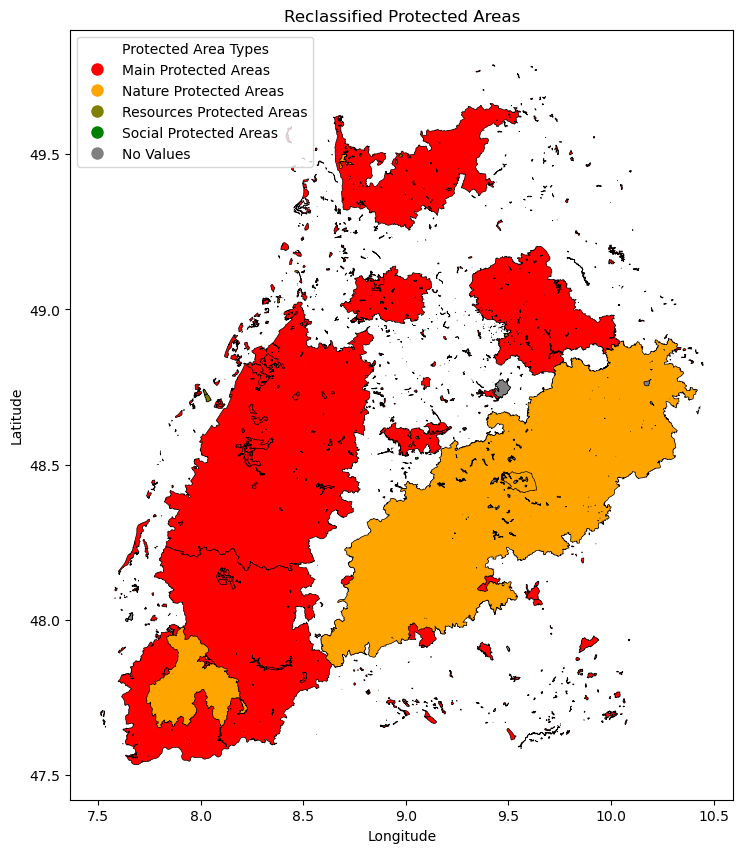

In [3]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D
import numpy as np

# Read the protected_area.geojson file into a GeoDataFrame
protected_areas = gpd.read_file('../data/output/protected_area.geojson')

# Define replacements for non-numeric values
replacements = {'1a': '1', '1b': '1'}

# Replace non-numeric values in the 'protect_class' column
protected_areas['protect_class'] = protected_areas['protect_class'].replace(replacements)

# Convert the 'protect_class' column to numeric, coercing non-numeric values to NaN
protected_areas['protect_class'] = pd.to_numeric(protected_areas['protect_class'], errors='coerce')

# Fill NaN values with 0
protected_areas['protect_class'] = protected_areas['protect_class'].fillna(0).astype(int)

# Get all distinct entries in the protect_class column
distinct_protect_classes = protected_areas['protect_class'].unique()

# Sort the distinct protect classes in ascending order
distinct_protect_classes_sorted = np.sort(distinct_protect_classes)

# Print the distinct protect classes sorted in ascending order
print(distinct_protect_classes_sorted)

# Define the reclassification rules
def reclassify_protect_class(protect_class):
    if 1 <= protect_class <= 6:
        return 1
    elif protect_class in [7, 97, 98, 99]:
        return 2
    elif protect_class in [12, 14, 15, 19]:
        return 3
    elif protect_class in [21, 22, 24, 27]:
        return 4
    else:
        return 5  # For all other values

# Apply the reclassification function to the 'protect_class' column
protected_areas['reclass_protect_class'] = protected_areas['protect_class'].apply(reclassify_protect_class)

# Define custom class labels
class_labels = {
    1: 'Main Protected Areas',
    2: 'Nature Protected Areas',
    3: 'Resources Protected Areas',
    4: 'Social Protected Areas',
    5: 'No Values'
}

# Define custom colors for each class
class_colors = {
    1: 'red',
    2: 'orange',
    3: 'olive',
    4: 'green',
    5: 'gray'
}

# Plot the reclassified data with custom colors and labels
fig, ax = plt.subplots(figsize=(10, 10))
legend_handles = []
for class_value in sorted(class_labels.keys()):
    class_label = class_labels[class_value]
    class_color = class_colors[class_value]
    class_data = protected_areas[protected_areas['reclass_protect_class'] == class_value]
    class_handle = Line2D([0], [0], marker='o', color='w', markerfacecolor=class_color, label=class_label, markersize=10)
    legend_handles.append(class_handle)
    class_data.plot(ax=ax, color=class_color, edgecolor='black', linewidth=0.5)

# Add legend with custom handles
ax.legend(handles=legend_handles, loc='upper left', title='Protected Area Types')

plt.title('Reclassified Protected Areas')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Save the plot to a file using fig.savefig()
fig.savefig("../plots/protected_area_reclass.png", dpi=300, bbox_inches="tight")

# Save the reclassified data as GeoJSON
protected_areas.to_file("../data/output/protected_area_reclass.geojson", driver='GeoJSON')

## classify isochrones with population in reachibility

### car

In [2]:
import os
import geopandas as gpd

def calculate_index(time_seconds, total_pop):
    # Calculate the index based on time value and total population
    # You can customize this calculation based on your specific criteria
    # Here's a simple example:
    index = (3600 - time_seconds) * (total_pop / 8128445)  # Adjust as needed
    return index

def assign_class(index):
    # Assign classes based on the calculated index
    if index >= 90:
        return 10
    elif index >= 80:
        return 9
    elif index >= 70:
        return 8
    elif index >= 60:
        return 7
    elif index >= 50:
        return 6
    elif index >= 40:
        return 5
    elif index >= 30:
        return 4
    elif index >= 20:
        return 3
    elif index >= 10:
        return 2
    else:
        return 1

def process_geojson(filepath):
    # Read GeoJSON file
    gdf = gpd.read_file(filepath)

    # Calculate index and assign class
    gdf['index'] = gdf.apply(lambda row: calculate_index(row['value'], row['total_pop']), axis=1)
    gdf['class'] = gdf['index'].apply(assign_class)

    # Save updated GeoJSON with new class column
    output_filepath = filepath.replace('.geojson', '_reclass.geojson')
    gdf.to_file(output_filepath, driver='GeoJSON')

    print(f"File saved with reclassified class column: {output_filepath}")

# Define the folder containing the GeoJSON files
folder_path = '../data/output/isochrones_car/'

# Iterate over each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.geojson'):
        # Construct the full filepath
        filepath = os.path.join(folder_path, filename)
        
        # Process the GeoJSON file
        process_geojson(filepath)


Columns in the GeoDataFrame:
Index(['group_index', 'value', 'total_pop', 'geometry'], dtype='object')

First few rows of the GeoDataFrame:
   group_index   value  total_pop  \
0            0   600.0     2425.0   
1            0  1200.0    41158.0   
2            0  1800.0   112161.0   
3            0  2700.0   516904.0   
4            0  3600.0  1378827.0   

                                            geometry  
0  POLYGON ((9.50737 49.73012, 9.50771 49.72805, ...  
1  POLYGON ((9.39563 49.70593, 9.39800 49.69906, ...  
2  POLYGON ((9.29886 49.70835, 9.29888 49.70475, ...  
3  POLYGON ((9.00557 49.99526, 9.00820 49.99411, ...  
4  POLYGON ((8.57987 50.05568, 8.57996 50.05208, ...  


### bike
weigh better than car

In [ ]:
import os
import geopandas as gpd

def calculate_index(time_seconds, total_pop):
    # Calculate the index based on time value and total population
    # You can customize this calculation based on your specific criteria
    # Here's a simple example:
    index = (3600 - time_seconds) * (total_pop / 1269190)  # Adjust as needed
    return index

def assign_class(index):
    # Assign classes based on the calculated index
    if index >= 90:
        return 10
    elif index >= 80:
        return 9
    elif index >= 70:
        return 8
    elif index >= 60:
        return 7
    elif index >= 50:
        return 6
    elif index >= 40:
        return 5
    elif index >= 30:
        return 4
    elif index >= 20:
        return 3
    elif index >= 10:
        return 2
    else:
        return 1

def process_geojson(filepath):
    # Read GeoJSON file
    gdf = gpd.read_file(filepath)

    # Calculate index and assign class
    gdf['index'] = gdf.apply(lambda row: calculate_index(row['value'], row['total_pop']), axis=1)
    gdf['class'] = gdf['index'].apply(assign_class)

    # Save updated GeoJSON with new class column
    output_filepath = filepath.replace('.geojson', '_reclass.geojson')
    gdf.to_file(output_filepath, driver='GeoJSON')

    print(f"File saved with reclassified class column: {output_filepath}")

# Define the folder containing the GeoJSON files
folder_path = '../data/output/isochrones_bike/'

# Iterate over each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.geojson'):
        # Construct the full filepath
        filepath = os.path.join(folder_path, filename)
        
        # Process the GeoJSON file
        process_geojson(filepath)



### pedestrian
weigh better than car

In [ ]:
import os
import geopandas as gpd

def calculate_index(time_seconds, total_pop):
    # Calculate the index based on time value and total population
    # You can customize this calculation based on your specific criteria
    # Here's a simple example:
    index = (3600 - time_seconds) * (total_pop / 236125)  # Adjust to max value
    return index

def assign_class(index):
    # Assign classes based on the calculated index
    if index >= 90:
        return 10
    elif index >= 80:
        return 9
    elif index >= 70:
        return 8
    elif index >= 60:
        return 7
    elif index >= 50:
        return 6
    elif index >= 40:
        return 5
    elif index >= 30:
        return 4
    elif index >= 20:
        return 3
    elif index >= 10:
        return 2
    else:
        return 1

def process_geojson(filepath):
    # Read GeoJSON file
    gdf = gpd.read_file(filepath)

    # Calculate index and assign class
    gdf['index'] = gdf.apply(lambda row: calculate_index(row['value'], row['total_pop']), axis=1)
    gdf['class'] = gdf['index'].apply(assign_class)

    # Save updated GeoJSON with new class column
    output_filepath = filepath.replace('.geojson', '_reclass.geojson')
    gdf.to_file(output_filepath, driver='GeoJSON')

    print(f"File saved with reclassified class column: {output_filepath}")

# Define the folder containing the GeoJSON files
folder_path = '../data/output/isochrones_walk/'

# Iterate over each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.geojson'):
        # Construct the full filepath
        filepath = os.path.join(folder_path, filename)
        
        # Process the GeoJSON file
        process_geojson(filepath)



## classify distances to infrastructes

### powerplants

classify per power source

In [5]:
import geopandas as gpd

# Load power plants GeoJSON file
power_plants = gpd.read_file("../data/output/water_distance.geojson")

# Replace the colon (:) with an underscore (_) in the column name
power_plants.columns = power_plants.columns.str.replace(':', '_')

# Print all column names
for col in power_plants.columns:
    print(col)

# Define a function to classify power sources
def classify_power_source(power_source):
    if power_source is not None and any(source in ['solar', 'air', 'wind', 'geothermal', 'hydro', 'wind;battery', 'waste', 'solar;wind', 'biogas'] for source in power_source.split(';')):
        return 10
    elif power_source is not None and any(source in ['biomass', 'coal;biomass', 'biomass;oil', 'gas;solar', 'gas;biomass'] for source in power_source.split(';')):
        return 7
    elif power_source is not None and any(source in ['coal', 'coal;gas', 'coal;gas;biomass', 'coal;oil', 'coal;oil;waste', 'gas', 'gas;oil', 'oil;gas'] for source in power_source.split(';')):
        return 1
    else:
        return 0

# Create a new column "classification" based on "plant_source"
power_plants['classification_plant_source'] = power_plants['plant_source'].apply(classify_power_source)

# Print all column names with the new classification column
for col in power_plants.columns:
    print(col)

# Save the modified GeoDataFrame to a new GeoJSON file
power_plants.to_file("../data/output/classified_power_plants.geojson", driver='GeoJSON')


id
longitude
latitude
distance_to_telecom
nearest_telecom
distance_to_powerplant
plant_method
plant_source
name
distance_to_powerline
distance_to_water
area
water
geometry
id
longitude
latitude
distance_to_telecom
nearest_telecom
distance_to_powerplant
plant_method
plant_source
name
distance_to_powerline
distance_to_water
area
water
geometry
classification_plant_source


classify distance

In [6]:
import geopandas as gpd

# Read the GeoJSON file
gdf = gpd.read_file("../data/output/classified_power_plants.geojson")

# Define a function to classify distances
def classify_distance(distance):
    # Define the range for each class
    class_ranges = [(0, 1000), (1000, 2000), (2000, 3000), (3000, 4000), (4000, 5000),
                    (5000, 6000), (6000, 7000), (7000, 8000), (8000, 9000), (9000, float('inf'))]
    
    # Iterate over class ranges and assign class based on distance
    for i, (start, end) in enumerate(class_ranges, start=1):
        if start <= distance < end:
            return i

# Apply the classification function to create the new column
gdf['classification_powerplant_distance'] = gdf['distance_to_powerplant'].apply(classify_distance)

# Save the GeoDataFrame to a new GeoJSON file
output_file = "../data/output/powerplant_class_distance.geojson"
gdf.to_file(output_file, driver='GeoJSON')

print(f"New GeoJSON file saved as: {output_file}")


New GeoJSON file saved as: ../data/output/powerplant_class_distance.geojson


### powerlines

In [7]:
import geopandas as gpd

# Read the GeoJSON file
gdf = gpd.read_file("../data/output/powerplant_class_distance.geojson")

# Define a function to classify distances
def classify_distance(distance):
    # Define the range for each class
    class_ranges = [(0, 1000), (1000, 2000), (2000, 3000), (3000, 4000), (4000, 5000),
                    (5000, 6000), (6000, 7000), (7000, 8000), (8000, 9000), (9000, float('inf'))]
    
    # Iterate over class ranges and assign class based on distance
    for i, (start, end) in enumerate(class_ranges, start=1):
        if start <= distance < end:
            return i

# Apply the classification function to create the new column
gdf['classification_powerline_distance'] = gdf['distance_to_powerline'].apply(classify_distance)

# Save the GeoDataFrame to a new GeoJSON file
output_file = "../data/output/powerlines_class_distance.geojson"
gdf.to_file(output_file, driver='GeoJSON')

print(f"New GeoJSON file saved as: {output_file}")


New GeoJSON file saved as: ../data/output/powerlines_class_distance.geojson


### telecom

In [8]:
import geopandas as gpd

# Read the GeoJSON file
gdf = gpd.read_file("../data/output/powerlines_class_distance.geojson")

# Define a function to classify distances
def classify_distance(distance):
    # Define the range for each class
    class_ranges = [(0, 1000), (1000, 2000), (2000, 3000), (3000, 4000), (4000, 5000),
                    (5000, 6000), (6000, 7000), (7000, 8000), (8000, 9000), (9000, float('inf'))]
    
    # Iterate over class ranges and assign class based on distance
    for i, (start, end) in enumerate(class_ranges, start=1):
        if start <= distance < end:
            return i

# Apply the classification function to create the new column
gdf['classification_telecom_distance'] = gdf['distance_to_telecom'].apply(classify_distance)

# Save the GeoDataFrame to a new GeoJSON file
output_file = "../data/output/telecom_points_class_distance.geojson"
gdf.to_file(output_file, driver='GeoJSON')

print(f"New GeoJSON file saved as: {output_file}")


New GeoJSON file saved as: ../data/output/telecom_points_class_distance.geojson


### water
weighed after area for cooling

In [9]:
import geopandas as gpd

# Read the GeoJSON file
gdf = gpd.read_file("../data/output/telecom_points_class_distance.geojson")

# Define a function to classify areas
def classify_area(area):
    # Define the range for each class
    class_ranges = [(0, 2000), (2000, 4000), (4000, 6000), (6000, 8000), (8000, 10000),
                    (10000, 20000), (20000, 40000), (40000, 60000), (60000, 100000), (100000, float('inf'))]
    
    # Iterate over class ranges and assign class based on area
    for i, (start, end) in enumerate(class_ranges, start=1):
        if start <= area < end:
            return i

# Apply the classification function to create the new column
gdf['classification_water_area'] = gdf['area'].apply(classify_area)

# Save the GeoDataFrame to a new GeoJSON file
output_file = "../data/output/water_area_classified.geojson"
gdf.to_file(output_file, driver='GeoJSON')

print(f"New GeoJSON file saved as: {output_file}")


New GeoJSON file saved as: ../data/output/water_area_classified.geojson


In [12]:
import geopandas as gpd

# Read water_area_classified.geojson and grid_with_protected_areas_with_centroid_id.geojson
water_area_gdf = gpd.read_file("../data/output/water_area_classified.geojson")
protected_areas_gdf = gpd.read_file("../data/output/grid_with_protected_areas_with_centroid_id.geojson")

# Perform spatial join
water_area_with_protected = gpd.sjoin(water_area_gdf, protected_areas_gdf, how="left", op="intersects")

# Reset index of water_area_with_protected
water_area_with_protected = water_area_with_protected.reset_index(drop=True)

# Merge the protect_class and reclass_protect_class columns into water_area_classified
water_area_gdf["protect_class"] = water_area_with_protected["protect_class"]
water_area_gdf["reclass_protect_class"] = water_area_with_protected["reclass_protect_class"]

# Save the updated GeoDataFrame to a new GeoJSON file
output_file = "../data/output/centroids_classified.geojson"
water_area_gdf.to_file(output_file, driver="GeoJSON")

print(f"New GeoJSON file saved as: {output_file}")


New GeoJSON file saved as: ../data/output/centroids_classified.geojson


/Users/celinathome/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
